<a href="https://colab.research.google.com/github/HiteshBhanushali/Image-Classification/blob/main/Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# !pip install tensorflow
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

# Step 2: Load and Preprocess Data
# Use the CIFAR-10 dataset, which includes images of cats and dogs
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Print the original shape of the images
print(f"Original training images shape: {train_images.shape}")
print(f"Original test images shape: {test_images.shape}")

# Filter the dataset for cats (label=3) and dogs (label=5)
train_filter = np.isin(train_labels, [3, 5]).flatten()
test_filter = np.isin(test_labels, [3, 5]).flatten()

train_images, train_labels = train_images[train_filter], train_labels[train_filter]
test_images, test_labels = test_images[test_filter], test_labels[test_filter]

# Print the shape after filtering
print(f"Filtered training images shape: {train_images.shape}")
print(f"Filtered test images shape: {test_images.shape}")

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to binary (cat=0, dog=1)
train_labels = np.where(train_labels == 3, 0, 1)
test_labels = np.where(test_labels == 3, 0, 1)

# Step 3: Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Step 4: Compile and Train Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Step 5: Evaluate Model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.2f}")



Original training images shape: (50000, 32, 32, 3)
Original test images shape: (10000, 32, 32, 3)
Filtered training images shape: (10000, 32, 32, 3)
Filtered test images shape: (2000, 32, 32, 3)
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.5725 - loss: 0.6743 - val_accuracy: 0.6700 - val_loss: 0.6073
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.6875 - loss: 0.5951 - val_accuracy: 0.7155 - val_loss: 0.5470
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.7312 - loss: 0.5375 - val_accuracy: 0.7235 - val_loss: 0.5278
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.7388 - loss: 0.5146 - val_accuracy: 0.7550 - val_loss: 0.5054
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.7562 - loss: 0.4843 - val_accuracy: 0.7345 - val_loss: 0.5201
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.7817 - loss: 0.4562 - val_accuracy: 0.7475 - val_loss: 0.5044
Epoch 7/10
313/313 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


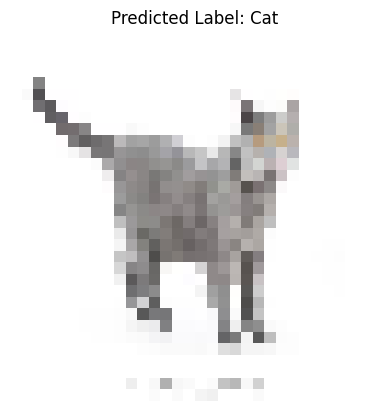

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as keras_image
# Step 6: Predict and Print Label for a New Image
def predict_image_label(model, image_path):
    """
    Predict the label for a single image and print it.

    Parameters:
    model (tf.keras.Model): Trained CNN model.
    image_path (str): Path to the image to predict.
    """
    # Load and preprocess the image
    img = keras_image.load_img(image_path, target_size=(32, 32))
    img_array = keras_image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)
    label = "Dog" if prediction[0] > 0.5 else "Cat"

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted Label: {label}")
    plt.axis('off')
    plt.show()

# Example usage: predict label for your own image
image_path = '/content/cat4.jpeg'  # Replace with the path to your image
predict_image_label(model, image_path)